# Анализ сервиса аренды самокатов GoFast.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.


**План проекта:**
- Изучение данных;
- Предобработка данных;
- Исследовательский анализ;
- Объединение данных;
- Подсчет выручки.
- Проветка гипотез

**Описание данных:**
1. `users_go`
    - `user_id` - уникальный идентификатор пользователя
    - `name` - имя пользователя
    - `age` - возраст
    - `city` - город
    - `subscription_type` - тип подписки (free, ultra)
2. `rides_go`
    - `user_id` - уникальный идентификатор пользователя
    - `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    - `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    - `date` - дата совершения поездки
3. `subscriptions_go`
    - `subscription_type` - тип подписки
    - `minute_price` - стоимость одной минуты поездки по данной подписке
    - `start_ride_price` - стоимость начала поездки
    - `subscription_fee` - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

##### Загружаем данные пользователей

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
#выведем информаццию о данных пользователей
users.info()
#посмотрим пропуски в данных
users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

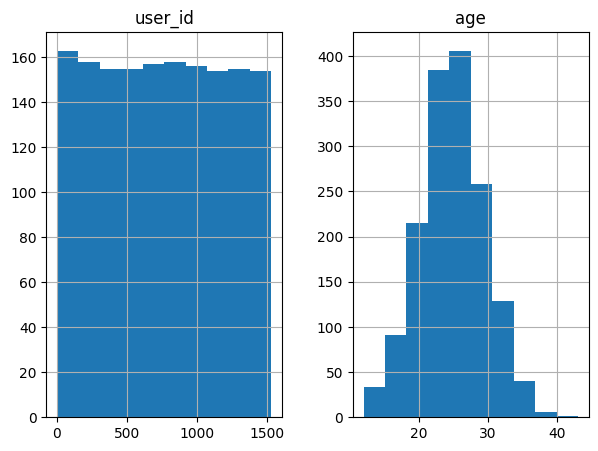

In [5]:
#посттроим диаграммы по всем числовым столцам
users.hist(figsize=(7, 5))

##### Загружаем данные поездок

In [6]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
#выведем информаццию о данных поездок
rides.info()
#посмотрим пропуски в данных
rides.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


user_id     0
distance    0
duration    0
date        0
dtype: int64

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

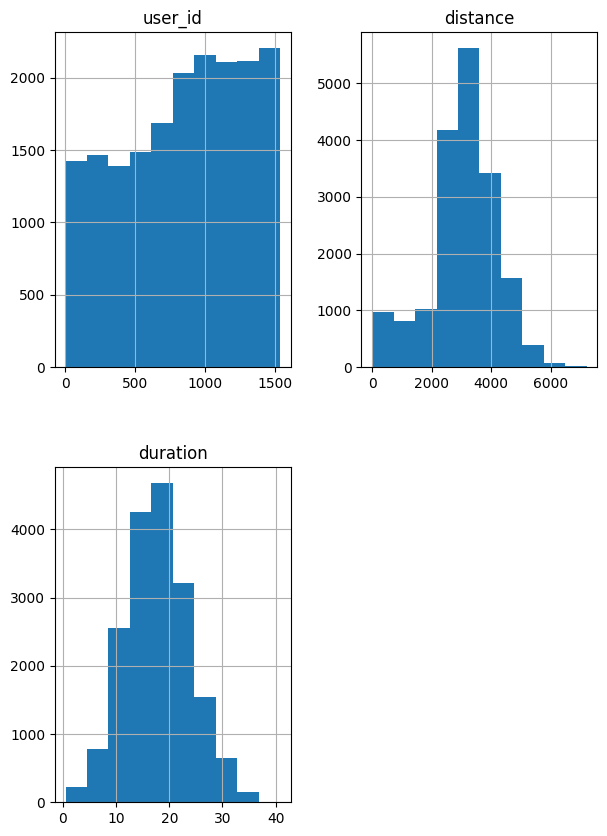

In [8]:
#посттроим диаграммы по всем числовым столцам
rides.hist(figsize=(7, 10))

##### Загружаем данные поездок

In [9]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
#выведем информаццию о данных подписок
subscriptions.info()
#посмотрим пропуски в данных
subscriptions.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Вывод по первому пункту: в данных пользователей имеется 1565 записей, пропуски отсутствуют. В данных поездок имеется 18068 записи, пропуски отсутствуют. В данных подписок 2 записи, пропуски отсутствуют.

#### Шаг 2. Предобработка данных

In [11]:
#изменим тип столбца date с типа object на тип datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [13]:
#изменим тип столбца date с типа object на тип datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [14]:
#изменим тип столбца date с типа object на тип datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [15]:
#проверим уникальные значения года в данных 
rides['date'].dt.year.unique()

array([2021], dtype=int64)

In [16]:
#создаем столбец с номером месяца в таблице rides
rides['month'] = rides['date'].dt.month
rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9], dtype=int64)

In [17]:
#проверим данные на явные дубликаты
users.duplicated().sum()

31

In [18]:
#удалим явные дуликаты в данных пользователей
users = users.drop_duplicates().reset_index(drop=True)
#проверим количество дубликатов
users.duplicated().sum()

0

In [19]:
users.loc[(users[['user_id', 'name', 'age']].duplicated())]  

,user_id,name,age,city,subscription_type


In [20]:
#уникальные значения столбца с данными о городах
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [21]:
#проверим дубликаты в датасете rides
rides.duplicated().sum()

0

In [22]:
#округлим расстояние до 2-х знаков после запятой
rides['distance'] = rides['distance'].round(2)
#округлим продолжительность сессии до целых минут вверх и приведем к целочисленному типу
rides['duration'] = np.ceil(rides['duration']).astype('int')

In [23]:
#проверим дубликаты в датасете subscriptions
subscriptions.duplicated().sum()

0

Вывод по второму пункту: в датасете `users` удалили 31 дубликат, неявных дубликатов не имеется. В датасете `rides` явные дубликаты не были выявлены, изменили тип данных в столбце `date`, добавили столбец с номером месяца, округлили расстояние до двух знаком после запятой и округлили продолжительность сессии до целых минут вверх. В датасете `subscriptions` ничего не меняли.

#### Шаг 3. Исследовательский анализ данных

#####  Частота встречаемости городов.

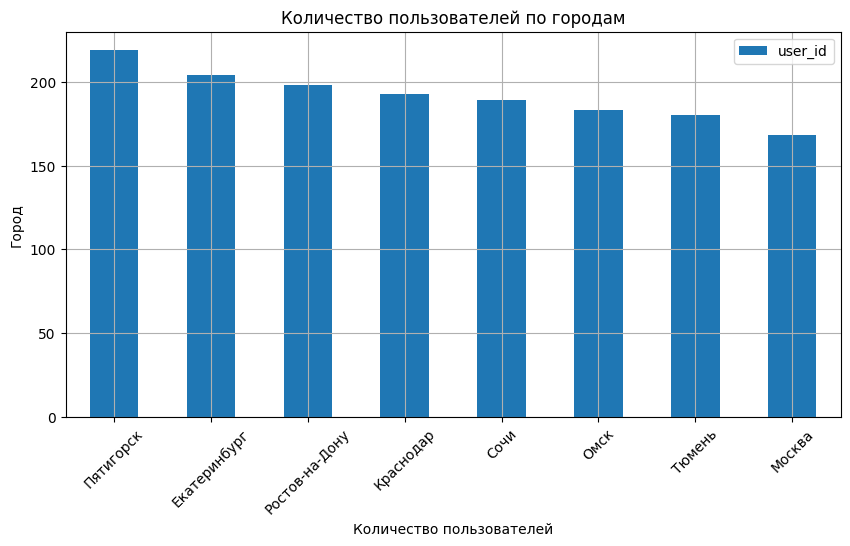

In [24]:
(users
 .pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
 .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Количество пользователей')
plt.xticks(rotation=45)

plt.show()

In [25]:
users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Вывод: наибольшее количество пользователей в Пятигорске, наименьшее - в Москве. По графику видно, что в первую пятерку входят в основном южные города, это объясняется тем, что сезон проката в этих городах дольше, чем северных, исключением является Екатеринбург, который находиться на второй позиции.

##### Соотношение пользователей с подпиской и без подписки

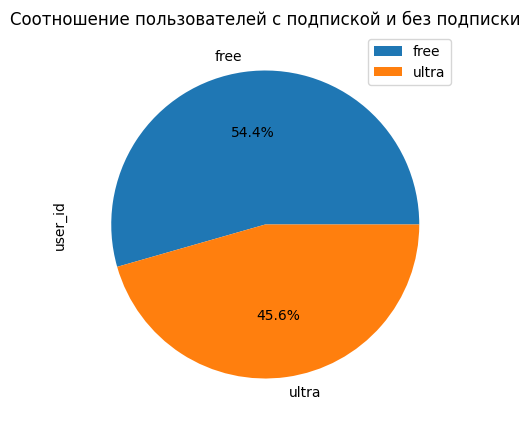

In [26]:
(users
 .pivot_table(index='subscription_type', values='user_id', aggfunc='count')
 .plot(kind='pie', y='user_id', figsize=(5, 5), autopct='%1.1f%%')
)
plt.title('Соотношение пользователей с подпиской и без подписки')


plt.show()

Вывод: количество пользователей без подписки 54.4%, с подпиской - 45.6%.

##### Возраст пользователей

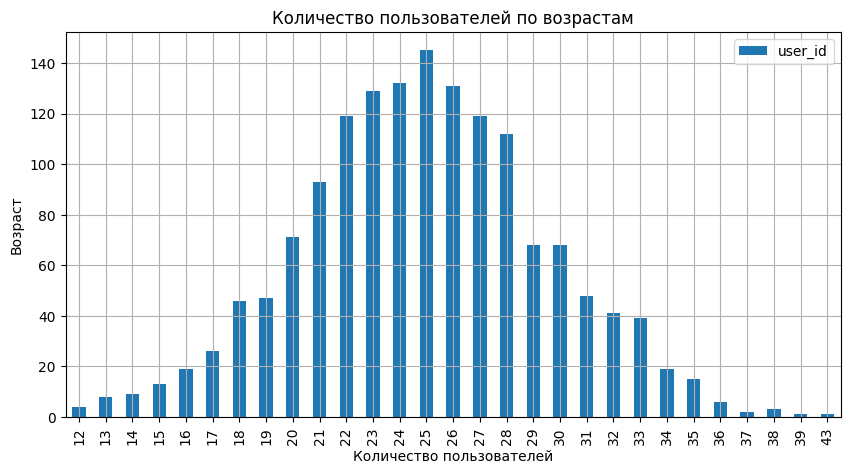

In [27]:
(users
 .pivot_table(index='age', values='user_id', aggfunc='count')
 .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.ylabel('Возраст')
plt.xlabel('Количество пользователей')

plt.show()

In [28]:
print(users['age'].mean())
users['age'].describe()

24.903520208604956


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Вывод: по графику видно, что возраст пользователей подчиняется нормальному распределению с медианой 25 лет, средний возраст и медиана практически совпадают.

##### Расстояние, которое пользователь преодолел за одну поездку

In [29]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

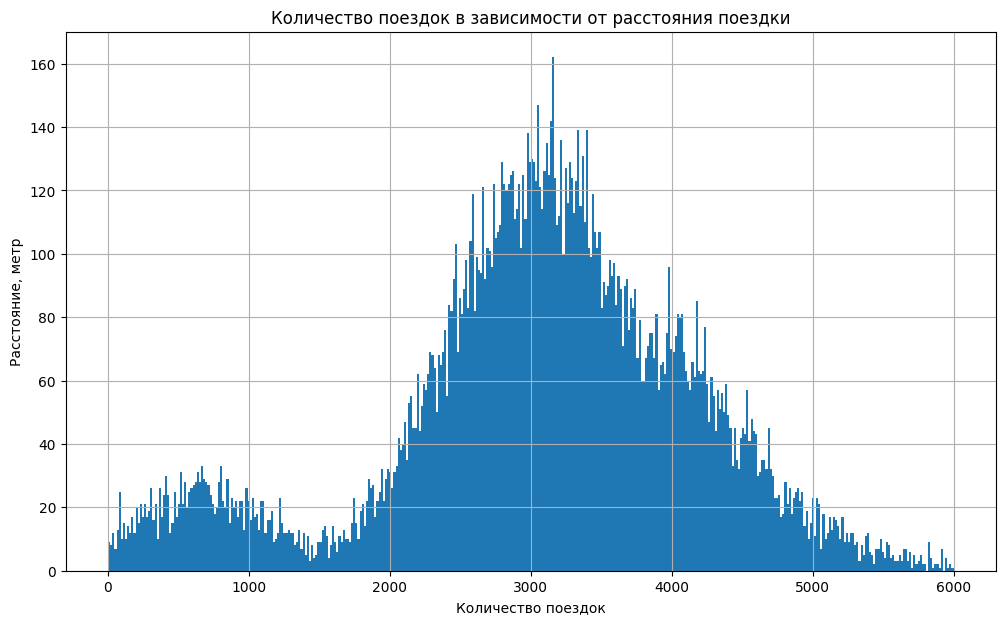

In [30]:
rides['distance'].hist(bins=400, range=(1, 6000), figsize=(12, 7))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.ylabel('Расстояние, метр')
plt.xlabel('Количество поездок')

plt.show()

Вывод: по графику видно, что на гистограмме имеется два пика: 700  и 3100, в промежутке с 1500 до 50000 нормальное распределение зависимости.

##### Продолжительность поездок

In [31]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

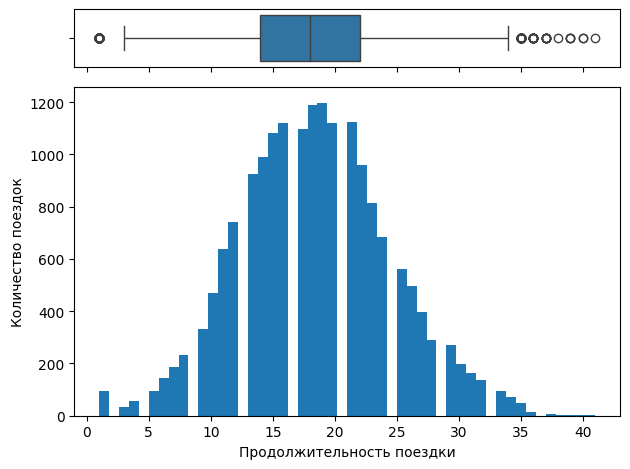

In [32]:
#rides['duration'].hist(bins=41, range=(1, 41))
#plt.title('Количество поездок в зависимости от продолжительности')
#plt.ylabel('Продолжительность поездки')
#plt.xlabel('Количество поездок')

#plt.show()


# Создаем фигуру с двумя осями, расположенными вертикально
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Строим боксплот вверху
sns.boxplot(x=rides['duration'], ax=ax_box)

# Строим гистограмму внизу
ax_hist.hist(rides['duration'], bins=50)
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')

# Убираем подпись оси X для боксплота
ax_box.set(xlabel='')

plt.tight_layout()
plt.show()

Вывод: по графику видно, что зависимость продолжительности поездок подчиняется нормальному распределению, медианное значение - 18 минут.

Вывод по третьему пункту: 
- Наибольшее количество пользователей в Пятигорске, наименьшее - в Москве. В первую пятерку входят в основном южные города, это объясняется тем, что сезон проката в этих городах дольше, чем северных, исключением является Екатеринбург, который находиться на второй позиции.
- Количество пользователей без подписки 54.4%, с подпиской - 45.6%.
- Возраст пользователей подчиняется нормальному распределению с медианой 25 лет, средний возраст и медиана практически совпадают.
- Количество поездок в зависимости от расстояния показывает, что медиана поездок находится на 3133 метров первый квартиль находится на значении 2543 метра, третий квартиль на 3776 метров. В промежутке с 1500 до 50000 наблюдается нормальное распределение зависимости, но имеется второй пик на 700 метров, и хотя он не попадает в основное распределение, просто откидывать его нельзя.
- Зависимость продолжительности поездок подчиняется нормальному распределению, медианное значение - 18 минут, основные значения времени поезди лежат в интервале от 14 до 22 минут.

#### Шаг 4. Объединение данных

In [33]:
#объединим три датасета в один
data = (users.merge(subscriptions, on='subscription_type')).merge(rides, on='user_id')

In [34]:
#выведем первые пять строк
data.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.92,26,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.59,16,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,7,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.78,19,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.69,27,2021-08-28,8


In [35]:
#выведем информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   minute_price       18068 non-null  int64         
 6   start_ride_price   18068 non-null  int64         
 7   subscription_fee   18068 non-null  int64         
 8   distance           18068 non-null  float64       
 9   duration           18068 non-null  int32         
 10  date               18068 non-null  datetime64[ns]
 11  month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 1.7+ MB


Вывод: датасет содержит 18068 строк, что соответствует датасету `rides`, пропуски отсутствуют.

In [36]:
#создадим датасет с иинформацией о пользователях без подписки
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.69,15,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.93,17,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.43,21,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.91,10,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.38,18,2021-02-14,2


In [37]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [38]:
data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [39]:
#создадим датасет и иинформацией о пользователях с подпиской
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.92,26,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.59,16,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,7,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.78,19,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.69,27,2021-08-28,8


In [40]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [41]:
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

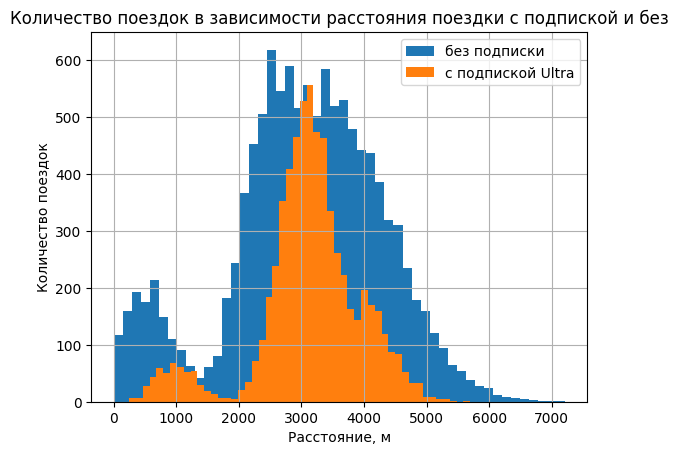

In [42]:
data_free['distance'].plot(kind = 'hist', grid=True, bins = 50, label='без подписки')
data_ultra['distance'].plot(kind = 'hist', grid=True, bins = 50, label='с подпиской Ultra')
plt.title('Количество поездок в зависимости расстояния поездки с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()

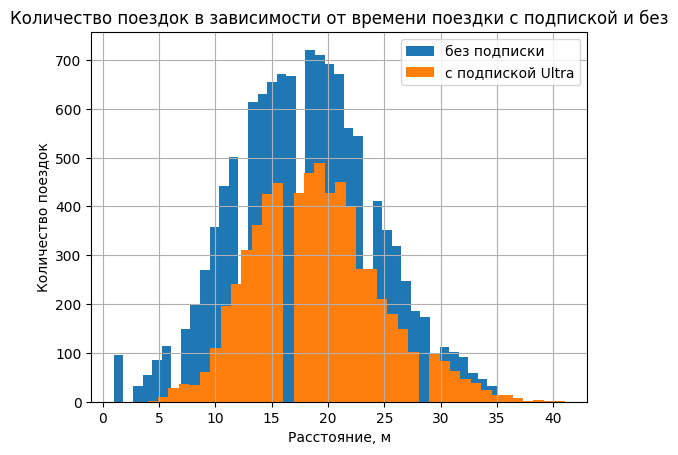

In [43]:
data_free['duration'].plot(kind = 'hist', grid=True, bins = 40, label='без подписки')
data_ultra['duration'].plot(kind = 'hist', grid=True, bins = 40, label='с подпиской Ultra')
plt.title('Количество поездок в зависимости от времени поездки с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()

Вывод по четвертому пункту: 
- Визуализация созданных датасетов зависимости количества поездок от расстояния по пользователям без подписки free и с подпиской ultra показывает, что подписка влияет на медианные значения (расстояния поездки без подписки 3114.65 метров с подпиской 3148.64 метров), при этом заметно что у пользователей с подпиской меньший разброс ( видно из графиков и по стандартному отклонению free - 1246,17 ultra - 836.89), также заметно смещение центра дополнительного пика с 500 метров (free) до 1000 (ultra).

- Визуализация созданных датасетов зависимости количества поездок от времени по  пользователям без подписки free и с подпиской ultra указывает, что подписка влияет на медианные значения (время поездки без подписки 18 мин с подпиской 19 мин), так же замечено снижение стандартного отклонения free - 6.33 ultra - 5.57.

#### Шаг 5. Подсчёт выручки

In [44]:
users_month = (data
               .pivot_table(index=('user_id','month'),
                               values=('city', 'subscription_type', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'date'),
                               aggfunc={'city' : 'first',
                                        'subscription_type' : 'first',
                                        'distance' : 'sum',
                                       'duration' : 'sum',
                                       'minute_price' : 'first',
                                        'start_ride_price' : 'first',
                                        'subscription_fee' : 'first',
                                        'date' : 'count'
                                       }
                              )
               .rename(columns={'distance' : 'distance_sum', 'duration' : 'duration_sum', 'date' : 'ride_count'})
              )
users_month.head()

city  ride_count  distance_sum  duration_sum  minute_price  \
user_id month                                                                 
1       1      Тюмень           2       7027.51            42             6   
        4      Тюмень           1        754.16             7             6   
        8      Тюмень           2       6723.47            46             6   
        10     Тюмень           2       5809.91            32             6   
        11     Тюмень           3       7003.50            56             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra

In [45]:
users_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               11331 non-null  object 
 1   ride_count         11331 non-null  int64  
 2   distance_sum       11331 non-null  float64
 3   duration_sum       11331 non-null  int32  
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
 7   subscription_type  11331 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 709.3+ KB


In [46]:
users_month.isna().sum()

city                 0
ride_count           0
distance_sum         0
duration_sum         0
minute_price         0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

В данных не имеется пропусков.

In [47]:
#создаем столбец с месячной выручкой
users_month['month_revenue'] = (
                              (users_month['start_ride_price'] * users_month['ride_count']) 
                            + (users_month['minute_price'] * users_month['duration_sum']) 
                            +  users_month['subscription_fee'])
users_month.head()

city  ride_count  distance_sum  duration_sum  minute_price  \
user_id month                                                                 
1       1      Тюмень           2       7027.51            42             6   
        4      Тюмень           1        754.16             7             6   
        8      Тюмень           2       6723.47            46             6   
        10     Тюмень           2       5809.91            32             6   
        11     Тюмень           3       7003.50            56             6   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   

               month_revenue  
user_id month                 
1       1                451  
        4                241  
        8                475  
        10               391  
        11               535

In [48]:
users_month['month_revenue'].sum()

3878641

Вывод по пятому пункту: создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из четвертого пункта. Добавили столбец с помесячной выручкой, которую принёс каждый пользователь. Выручка за год составила 3 878 641 рублей.

#### Шаг 6. Проверка гипотез

##### Гипотеза №1:

H0: Средняя продолжительность времени поздки пользователя с подпиской и без подписки равны.

H1: Средняя продолжительность времени поездки пользователя с подпиской больше, чем без подписки.

In [49]:
results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    equal_var=True, 
    alternative='greater')

print('p-значение:',results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 2.495945372073663e-34
Отвергаем нулевую гипотезу.


Вывод: средняя продолжительность времени поездки пользователя с подпиской больше, чем без подписки.

##### Гипотеза №2:

H0: Среднее расстояние поездок с подпиской равно 3130 метров.

H1: Среднее расстояние поездок с подпиской меньше 3130 метров.

In [50]:
mean_distance = 3130

results = st.ttest_1samp(
    data_ultra['distance'],
    mean_distance,
    alternative='less')

print('p-значение:',results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.08046373941575857
Не получилось отвергнуть нулевую гипотезу.


Вывод: среднее расстояние поездок с подпиской равно 3130 метров.

##### Гипотеза №3:

H0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

H1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [51]:
results = st.ttest_ind(
    users_month[users_month['subscription_type'] == 'ultra']['month_revenue'], 
    users_month[users_month['subscription_type'] == 'free']['month_revenue'], 
    equal_var=True, 
    alternative='greater')

print('p-значение:',results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


Вывод: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

##### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Если выборки зависимы, то нужно проверить равны ли средние совокупности до и после обновления сервера. Выдвигаем гипотезу:

H0: Среднее количество обращений до обновления и после обновления равны.

H1: Среднее количество обращений до обновления и после обновления НЕ равны.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок применяется метод `scipy.stats.ttest_rel(before, after)`.

Если выборки не зависимы, то применяем метод `scipy.stats.ttest_ind()` с проверкой односторонней гипотезы.

Вывод по шестому пункту: 
- Нулевая гипотеза отвергнута, средняя продолжительность времени поздки пользователя с подпиской больше, чем без подписки.
- Не получилось отвергнуть нулевую гипотезу, среднее расстояние поездок с подпиской равно 3130 метров.
- Нулевая гипотеза отвергнута, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- Дано пояснение применение методов `scipy.stats.ttest_rel(before, after)` и `scipy.stats.ttest_ind()`.

#### Общий вывод по работе:
1. Загрузка данных:
    - В данных пользователей имеется 1565 записей, пропуски отсутствуют.
    - В данных поездок имеется 18068 записи, пропуски отсутствуют.
    - В данных подписок 2 записи, пропуски отсутствуют.


2. Предобработка данных:
    - В датасете `users` удалили 31 дубликат, неявных дубликатов не имеется.
    - В датасете `rides` явные дубликаты не были выявлены, изменили тип данных в столбце `date`, добавили столбец с номером месяца, округлили расстояние до двух знаком после запятой и округлили продолжительность сессии до целых минут вверх.
    - В датасете `subscriptions` ничего не меняли.


3. Исследовательский анализ данных:
    - Наибольшее количество пользователей в Пятигорске, наименьшее - в Москве. В первую пятерку входят в основном южные города, это объясняется тем, что сезон проката в этих городах дольше, чем северных, исключением является Екатеринбург, который находиться на второй позиции.
    - Количество пользователей без подписки 54.4%, с подпиской - 45.6%.
    - Возраст пользователей подчиняется нормальному распределению с медианой 25 лет, средний возраст и медиана практически совпадают.
    - Количество поездок в зависимости от расстояния показывает, что медиана поездок находится на 3133 метров первый квартиль находится на значении 2543 метра, третий квартиль на 3776 метров. В промежутке с 1500 до 50000 наблюдается нормальное распределение зависимости, но имеется второй пик на 700 метров, и хотя он не попадает в основное распределение, просто откидывать его нельзя.
    - Зависимость продолжительности поездок подчиняется нормальному распределению, медианное значение - 18 минут, основные значения времени поезди лежат в интервале от 14 до 22 минут.


4. Объединение данных:
    - Визуализация созданных датасетов зависимости количества поездок от расстояния по пользователям без подписки free и с подпиской ultra показывает, что подписка влияет на медианные значения (расстояния поездки без подписки 3114.65 метров с подпиской 3148.64 метров), при этом заметно что у пользователей с подпиской меньший разброс ( видно из графиков и по стандартному отклонению free - 1246,17 ultra - 836.89), также заметно смещение центра дополнительного пика с 500 метров (free) до 1000 (ultra).
    - Визуализация созданных датасетов зависимости количества поездок от времени по пользователям без подписки free и с подпиской ultra указывает, что подписка влияет на медианные значения (время поездки без подписки 18 мин с подпиской 19 мин), так же замечено снижение стандартного отклонения free - 6.33 ultra - 5.57.


5. Подсчёт выручки:
    - Создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из четвертого пункта.
    - Добавили столбец с помесячной выручкой, которую принёс каждый пользователь.


6. Проверка гипотез:
    - Нулевая гипотеза отвергнута, средняя продолжительность времени поездки пользователя с подпиской больше, чем без подписки.
    - Не получилось отвергнуть нулевую гипотезу, среднее расстояние поездок с подпиской равно 3130 метров.
    - Нулевая гипотеза отвергнута, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    - Если выборки зависимы, то нужно проверить равны ли средние совокупности до и после обновления сервера. Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок применяется метод scipy.stats.ttest_rel(before, after). Если выборки не зависимы, то применяем метод scipy.stats.ttest_ind().